Hypothesis testing with Python

In [1]:
# Import libraries and packages.

### YOUR CODE HERE ### 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
data = pd.read_csv('marketing_sales_data.csv')
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


Step 2: Data exploration

First, use a boxplot to determine how Sales vary based on the TV promotion budget category.

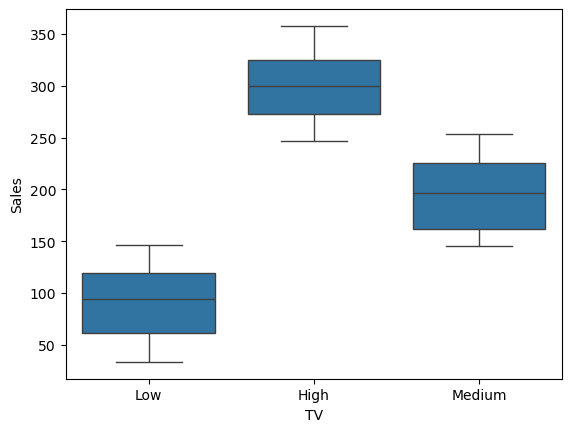

In [3]:
# Create a boxplot with TV and Sales.
sns.boxplot(x = "TV", y = "Sales", data = data);

There is considerable variation in Sales across the TV groups. The significance of these differences can be tested with a one-way ANOVA.

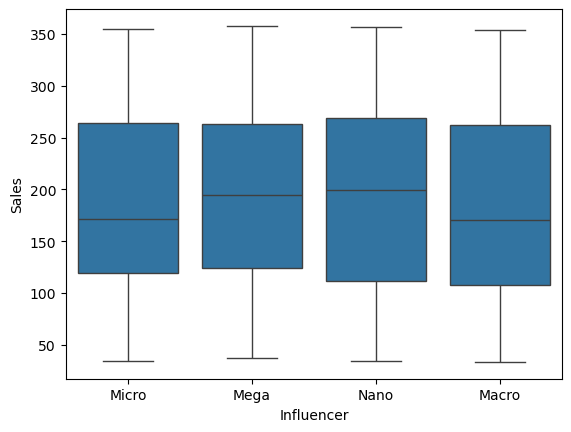

In [4]:
# Create a boxplot with Influencer and Sales.### 
sns.boxplot(x = "Influencer", y = "Sales", data = data);

In [5]:
# Drop rows that contain missing data and update the DataFrame.
data = data.dropna(axis=0)
# Confirm the data contain no missing values ### 
data.isnull().sum(axis=0)

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

Step 3: Model building

Fit a linear regression model that predicts Sales using one of the independent categorical variables in data. Refer to your previous code for defining and fitting a linear regression model.

In [6]:
# Define the OLS formula.
ols_formula = 'Sales ~ C(TV)'
# Create an OLS model.
OLS = ols(formula = ols_formula, data = data)
# Fit the model.
model = OLS.fit()
# Save the results summary.
model_results = model.summary()
# Display the model results.
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1918.
Date:                Sat, 01 Feb 2025   Prob (F-statistic):          1.38e-253
Time:                        00:52:13   Log-Likelihood:                -2798.9
No. Observations:                 572   AIC:                             5604.
Df Residuals:                     569   BIC:                             5617.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.8532      2.512    119.789      0.000     295.920     305.786
C(TV)[T.Low]     -209.8691      3.394    -61.841      0.000    -216.535    -203.203
C(TV)[T.Medium]  -105.4952      3.379    -31.224      0.000    -112.131     -98.859
==============================================================================
Omnibus:                      547.584   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.103
Skew:                           0.015   Prob(JB):                     8.77e-09
Kurtosis:                       1.753   Cond. No.                         3.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

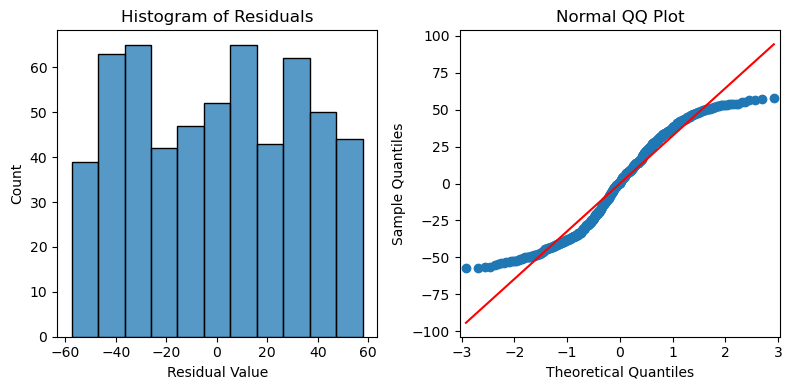

In [7]:
# Calculate the residuals.
residuals = model.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals.
sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a QQ plot of the residuals.
sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the QQ plot.
axes[1].set_title("Normal QQ Plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()

There is reasonable concern that the normality assumption is not met when TV is used as the independent variable predicting Sales. The normal q-q forms an 'S' that deviates off the red diagonal line, which is not desired behavior.

However, for the purpose of the lab, continue assuming the normality assumption is met.


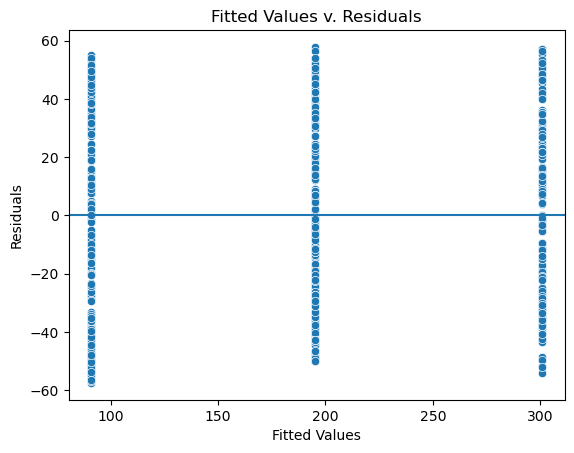

In [8]:
# Create a scatter plot with the fitted values from the model and the residuals.

fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Set the x axis label
fig.set_xlabel("Fitted Values")

# Set the y axis label
fig.set_ylabel("Residuals")

# Set the title
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

### YOUR CODE HERE ### 

fig.axhline(0)

# Show the plot
plt.show()

In [9]:
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1918.
Date:                Sat, 01 Feb 2025   Prob (F-statistic):          1.38e-253
Time:                        00:52:13   Log-Likelihood:                -2798.9
No. Observations:                 572   AIC:                             5604.
Df Residuals:                     569   BIC:                             5617.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.8532      2.512    119.789      0.000     295.920     305.786
C(TV)[T.Low]     -209.8691      3.394    -61.841      0.000    -216.535    -203.203
C(TV)[T.Medium]  -105.4952      3.379    -31.224      0.000    -112.131     -98.859
==============================================================================
Omnibus:                      547.584   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.103
Skew:                           0.015   Prob(JB):                     8.77e-09
Kurtosis:                       1.753   Cond. No.                         3.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# Create an one-way ANOVA table for the fit model.
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(TV),4.016116e+06,2.0,1917.749265,1.383230e-253
Residual,5.957948e+05,569.0,NaN,NaN


Perform an ANOVA post hoc test
If you have significant results from the one-way ANOVA test, you can apply ANOVA post hoc tests such as the Tukey’s HSD post hoc test.

Run the Tukey’s HSD post hoc test to compare if there is a significant difference between each pair of categories for TV.

In [11]:
# Perform the Tukey's HSD post hoc test.
tukey_oneway = pairwise_tukeyhsd(endog = data["Sales"], groups = data["TV"])

# Display the results
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-209.8691,0.0,-217.8438,-201.8944,True
High,Medium,-105.4952,0.0,-113.4346,-97.5557,True
Low,Medium,104.3739,0.0,96.8261,111.9218,True
